In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
match = pd.read_csv("matches.csv")
delivery = pd.read_csv("deliveries.csv")

In [3]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
match.shape

(1095, 20)

In [5]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [6]:
delivery.shape

(260920, 17)

In [7]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [8]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [9]:
total_score_df

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [10]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [11]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [12]:
teams = [
    'Royal Challengers Bangalore',
    'Punjab Kings',
    'Delhi Capitals',
    'Mumbai Indians', 
    'Kolkata Knight Riders',
    'Rajasthan Royals', 
    'Chennai Super Kings',
    'Sunrisers Hyderabad',
    'Lucknow Super Giants', 
    'Gujarat Titans'
]

In [13]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')

match_df['team1'] = match_df['team1'].str.replace('Royal Challengers Bengaluru','Royal Challengers Bengalore')
match_df['team2'] = match_df['team2'].str.replace('Royal Challengers Bengaluru','Royal Challengers Bengalore')

match_df['team1'] = match_df['team1'].str.replace('Gujarat Lions','Gujarat Titans')
match_df['team2'] = match_df['team2'].str.replace('Gujarat Lions','Gujarat Titans')

In [14]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [15]:
match_df.shape

(991, 22)

In [16]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [17]:
delivery_df = match_df.merge(delivery,on='match_id')

In [18]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [19]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236423,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
236424,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
236425,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
236426,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [20]:
delivery_df.shape

(114009, 20)

In [21]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [22]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']+1

In [23]:
delivery_df['balls_left'] = 120 - (delivery_df['over']*6 + delivery_df['ball'])

In [24]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,1,222,119
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0,NaN,NaN,NaN,2,221,118
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0,NaN,NaN,NaN,2,221,117
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0,NaN,NaN,NaN,3,220,116
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,4,219,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236423,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,110,4,61
236424,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,111,3,60
236425,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,112,2,59
236426,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,113,1,58


In [25]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

In [26]:
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10 - wickets

In [27]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,0,NaN,NaN,1,222,119,10
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,0,NaN,NaN,2,221,118,10
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,0,NaN,NaN,2,221,117,10
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,0,NaN,NaN,3,220,116,10
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,0,NaN,NaN,4,219,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236423,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,1,NaN,0,0,NaN,NaN,110,4,61,8
236424,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,1,NaN,0,0,NaN,NaN,111,3,60,8
236425,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,1,NaN,0,0,NaN,NaN,112,2,59,8
236426,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,1,NaN,0,0,NaN,NaN,113,1,58,8


In [28]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Rajkot', 'Kanpur', 'Bengaluru', 'Indore', 'Dubai', 'Sharjah',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [29]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,0,NaN,NaN,1,222,119,10
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,0,NaN,NaN,2,221,118,10
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,0,NaN,NaN,2,221,117,10
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,0,NaN,NaN,3,220,116,10
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,0,NaN,NaN,4,219,115,10


In [30]:
delivery_df['current_run_rate'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [31]:
delivery_df['required_run_rate'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [32]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [33]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [34]:
final_df = delivery_df[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'total_runs_x', 'current_run_rate', 'required_run_rate', 'result']]

In [35]:
final_df = final_df.sample(final_df.shape[0])

In [36]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,current_run_rate,required_run_rate,result
388,Kings XI Punjab,Chennai Super Kings,Chandigarh,176,82,9,240,10.263158,12.878049,0


In [37]:
final_df.dropna(inplace=True)

In [38]:
final_df = final_df[final_df['balls_left'] != 0]

In [39]:
X = final_df.iloc[:,:-1]
Y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [40]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,current_run_rate,required_run_rate
144543,Mumbai Indians,Delhi Capitals,Mumbai,85,33,5,213,8.896552,15.454545
150101,Delhi Capitals,Kolkata Knight Riders,Kolkata,122,87,9,178,10.363636,8.413793
69503,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,115,62,9,180,6.827586,11.129032
150126,Delhi Capitals,Kolkata Knight Riders,Kolkata,96,62,8,178,8.586207,9.290323
113077,Kolkata Knight Riders,Delhi Daredevils,Delhi,110,60,7,186,7.700000,11.000000
...,...,...,...,...,...,...,...,...,...
110887,Kolkata Knight Riders,Kings XI Punjab,Chandigarh,127,113,10,138,10.285714,6.743363
223078,Punjab Kings,Delhi Capitals,Mohali,151,109,10,174,13.090909,8.311927
232666,Rajasthan Royals,Sunrisers Hyderabad,Hyderabad,51,33,7,201,10.413793,9.272727
29661,Chennai Super Kings,Delhi Daredevils,Delhi,115,76,8,185,9.681818,9.078947


In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [43]:
pipe_lr = Pipeline(steps=[
    ('step1', trf),
    ('step2', LogisticRegression())
])
param_grid_lr = {
    'step2__penalty': ['l1', 'l2'],
    'step2__C': [0.001, 0.01, 0.1, 1, 10],
    'step2__solver': ['liblinear'],  
    'step2__max_iter': [50,100,150,200,250,300]
}
grid_search_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, Y_train)
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_
print(f"Best Parameters for Logistic Regression: {best_params_lr}")
print(f"Best Cross-Validation Score for Logistic Regression: {best_score_lr:.4f}")
best_lr_model = grid_search_lr.best_estimator_
Y_pred_lr_best = best_lr_model.predict(X_test)



Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters for Logistic Regression: {'step2__C': 10, 'step2__max_iter': 100, 'step2__penalty': 'l1', 'step2__solver': 'liblinear'}
Best Cross-Validation Score for Logistic Regression: 0.8081


In [44]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
accuracy_lr = accuracy_score(Y_test, Y_pred_lr_best)
precision_lr = precision_score(Y_test, Y_pred_lr_best)
recall_lr = recall_score(Y_test, Y_pred_lr_best)
f1_lr = f1_score(Y_test, Y_pred_lr_best)

In [45]:
best_lr_model.predict_proba(X_test)[10]

array([0.86918667, 0.13081333])

In [46]:
from sklearn.ensemble import RandomForestClassifier
pipe_rf = Pipeline(steps=[
    ('step1', trf),
    ('step2', RandomForestClassifier())
])
param_grid = {
    'step2__n_estimators': [50, 100, 200, 300],  
    'step2__max_depth': [None, 10, 20, 30],  
    'step2__min_samples_split': [2, 5, 10],  
    'step2__min_samples_leaf': [1, 2, 4]  
}
grid_search = GridSearchCV(pipe_rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")
best_rf_model = grid_search.best_estimator_
Y_pred_rf_best = best_rf_model.predict(X_test)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


c:\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'step2__max_depth': None, 'step2__min_samples_leaf': 1, 'step2__min_samples_split': 2, 'step2__n_estimators': 300}
Best Cross-Validation Score: 0.9971


In [47]:
accuracy_rf = accuracy_score(Y_test, Y_pred_rf_best)
precision_rf = precision_score(Y_test, Y_pred_rf_best)
recall_rf = recall_score(Y_test, Y_pred_rf_best)
f1_rf = f1_score(Y_test, Y_pred_rf_best)

In [48]:
best_rf_model.predict_proba(X_test)[10]

array([0.99333333, 0.00666667])

In [49]:
from sklearn.tree import DecisionTreeClassifier
pipe_dt = Pipeline(steps=[
    ('step1', trf),  
    ('step2', DecisionTreeClassifier())  
])
param_grid_dt = {
    'step2__criterion': ['gini', 'entropy'],  
    'step2__max_depth': [None, 10, 20, 30],   
    'step2__min_samples_split': [2, 5, 10],   
    'step2__min_samples_leaf': [1, 2, 4],     
    'step2__max_features': [None, 'sqrt', 'log2']  
}
grid_search_dt = GridSearchCV(pipe_dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, Y_train)
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_
print(f"Best Parameters for Decision Tree: {best_params_dt}")
print(f"Best Cross-Validation Score for Decision Tree: {best_score_dt:.4f}")
best_dt_model = grid_search_dt.best_estimator_
Y_pred_dt_best = best_dt_model.predict(X_test)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for Decision Tree: {'step2__criterion': 'entropy', 'step2__max_depth': None, 'step2__max_features': None, 'step2__min_samples_leaf': 1, 'step2__min_samples_split': 2}
Best Cross-Validation Score for Decision Tree: 0.9829


In [50]:
accuracy_dt = accuracy_score(Y_test, Y_pred_dt_best)
precision_dt = precision_score(Y_test, Y_pred_dt_best)
recall_dt = recall_score(Y_test, Y_pred_dt_best)
f1_dt = f1_score(Y_test, Y_pred_dt_best)

In [51]:
best_dt_model.predict_proba(X_test)[10]

array([1., 0.])

In [52]:
metrics_summary_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest','Decision Tree'],
    'Accuracy': [accuracy_lr, accuracy_rf,accuracy_dt],
    'Precision': [precision_lr, precision_rf,precision_dt],
    'Recall': [recall_lr, recall_rf,recall_dt],
    'F1 Score': [f1_lr, f1_rf,f1_dt]
})

print(metrics_summary_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.809657   0.814770  0.826274  0.820481
1        Random Forest  0.998451   0.998471  0.998588  0.998529
2        Decision Tree  0.988727   0.990158  0.988410  0.989283


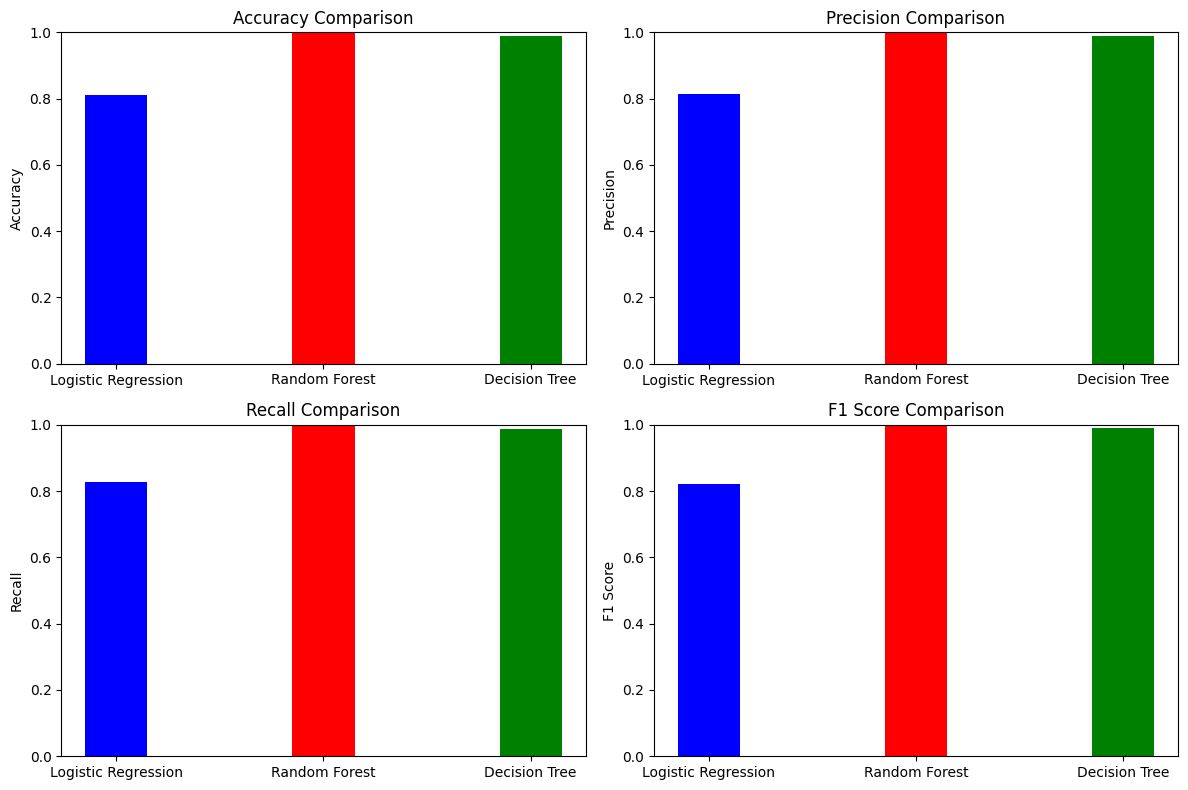

In [53]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values_lr = [accuracy_lr, precision_lr, recall_lr, f1_lr]
values_rf = [accuracy_rf, precision_rf, recall_rf, f1_rf]
values_dt = [accuracy_dt, precision_dt, recall_dt, f1_dt]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, metric in enumerate(metrics):
    axs[i].bar(['Logistic Regression', 'Random Forest', 'Decision Tree'], 
               [values_lr[i], values_rf[i], values_dt[i]], 
               color=['blue', 'red', 'green'], width=0.3)
    axs[i].set_title(f'{metric} Comparison')
    axs[i].set_ylim([0, 1])
    axs[i].set_ylabel(metric)

plt.tight_layout()
plt.show()

In [54]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    


In [55]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','current_run_rate','required_run_rate']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [58]:
temp_df_rf,target = match_progression(delivery_df,1304106,best_rf_model)
temp_df_rf

Target- 209


,end_of_over,runs_after_over,wickets_in_over,lose,win
201531,1,6,0,98.3,1.7
201538,2,10,0,98.7,1.3
201545,3,14,0,100.0,0.0
201551,4,3,1,98.7,1.3
201558,5,7,2,100.0,0.0
201564,6,3,0,100.0,0.0
201570,7,9,0,100.0,0.0
201576,8,18,0,99.7,0.3
201582,9,13,0,100.0,0.0
201589,10,11,0,99.3,0.7


Text(0.5, 1.0, 'Target-209')

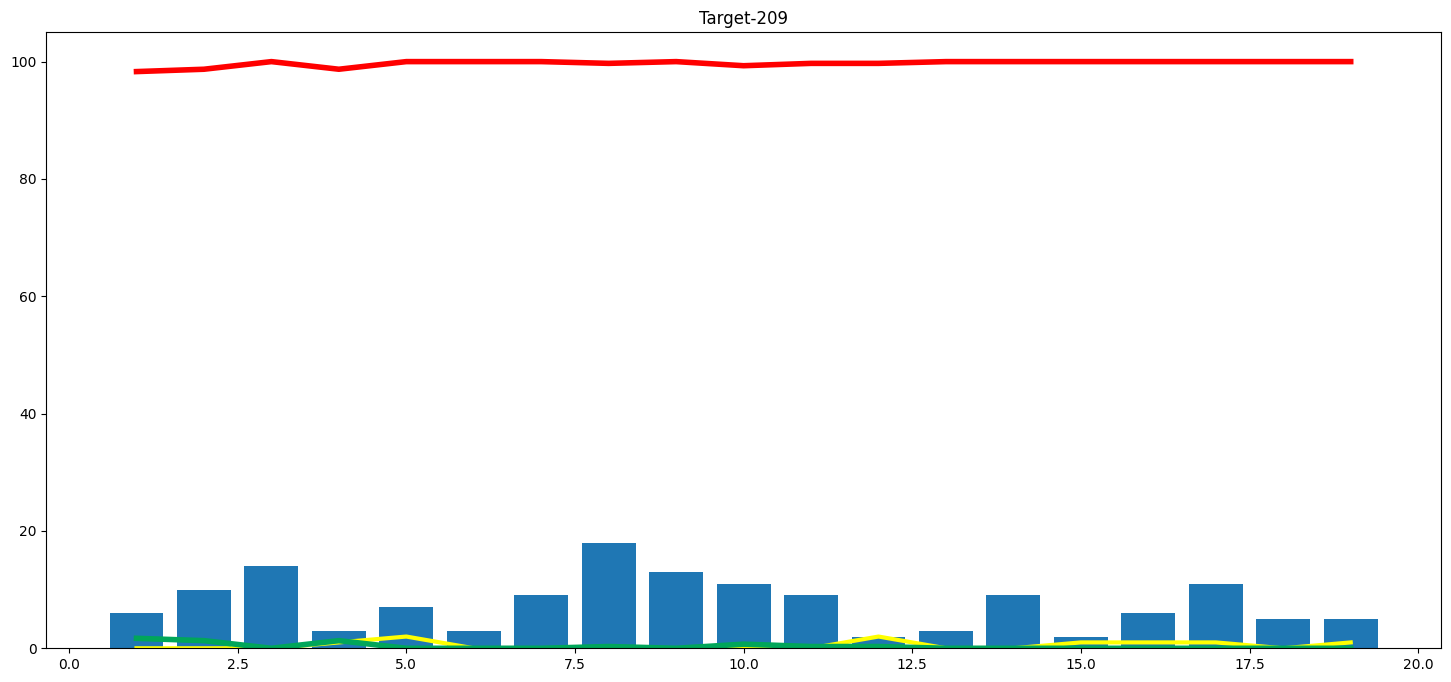

In [59]:
plt.figure(figsize=(18,8))
plt.plot(temp_df_rf['end_of_over'],temp_df_rf['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df_rf['end_of_over'],temp_df_rf['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df_rf['end_of_over'],temp_df_rf['lose'],color='red',linewidth=4)
plt.bar(temp_df_rf['end_of_over'],temp_df_rf['runs_after_over'])
plt.title('Target-' + str(target))

In [60]:
temp_df_dt,target = match_progression(delivery_df,1304095,best_dt_model)
temp_df_dt

Target- 173


,end_of_over,runs_after_over,wickets_in_over,lose,win
198955,1,8,0,100.0,0.0
198961,2,3,0,100.0,0.0
198967,3,10,0,100.0,0.0
198973,4,3,0,100.0,0.0
198979,5,12,0,100.0,0.0
198985,6,14,0,100.0,0.0
198991,7,8,1,100.0,0.0
198997,8,3,1,100.0,0.0
199003,9,10,0,100.0,0.0
199009,10,5,1,100.0,0.0


Text(0.5, 1.0, 'Target-173')

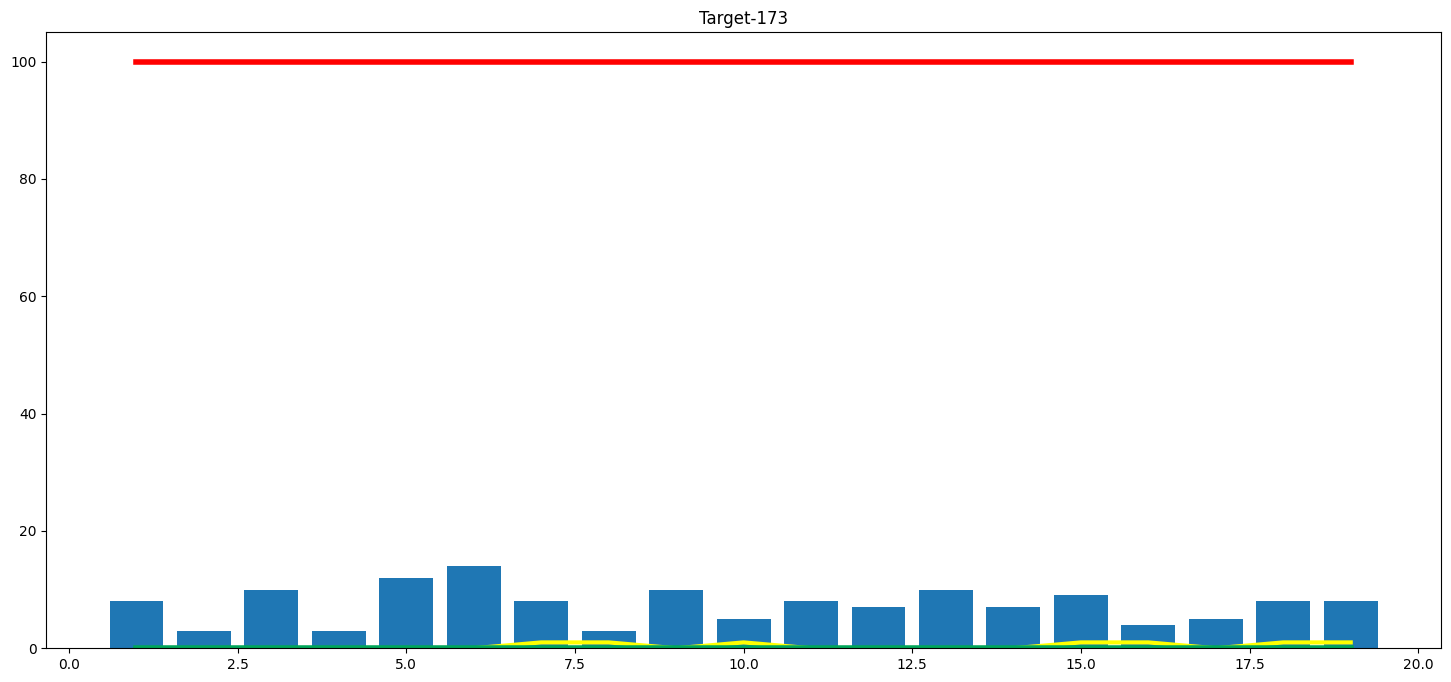

In [61]:
plt.figure(figsize=(18,8))
plt.plot(temp_df_dt['end_of_over'],temp_df_dt['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df_dt['end_of_over'],temp_df_dt['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df_dt['end_of_over'],temp_df_dt['lose'],color='red',linewidth=4)
plt.bar(temp_df_dt['end_of_over'],temp_df_dt['runs_after_over'])
plt.title('Target-' + str(target))

In [62]:
temp_df_lr,target = match_progression(delivery_df,1304095,best_lr_model)
temp_df_lr

Target- 173


,end_of_over,runs_after_over,wickets_in_over,lose,win
198955,1,8,0,33.4,66.6
198961,2,3,0,38.8,61.2
198967,3,10,0,31.4,68.6
198973,4,3,0,35.1,64.9
198979,5,12,0,25.9,74.1
198985,6,14,0,16.8,83.2
198991,7,8,1,23.8,76.2
198997,8,3,1,39.9,60.1
199003,9,10,0,33.3,66.7
199009,10,5,1,48.3,51.7


Text(0.5, 1.0, 'Target-173')

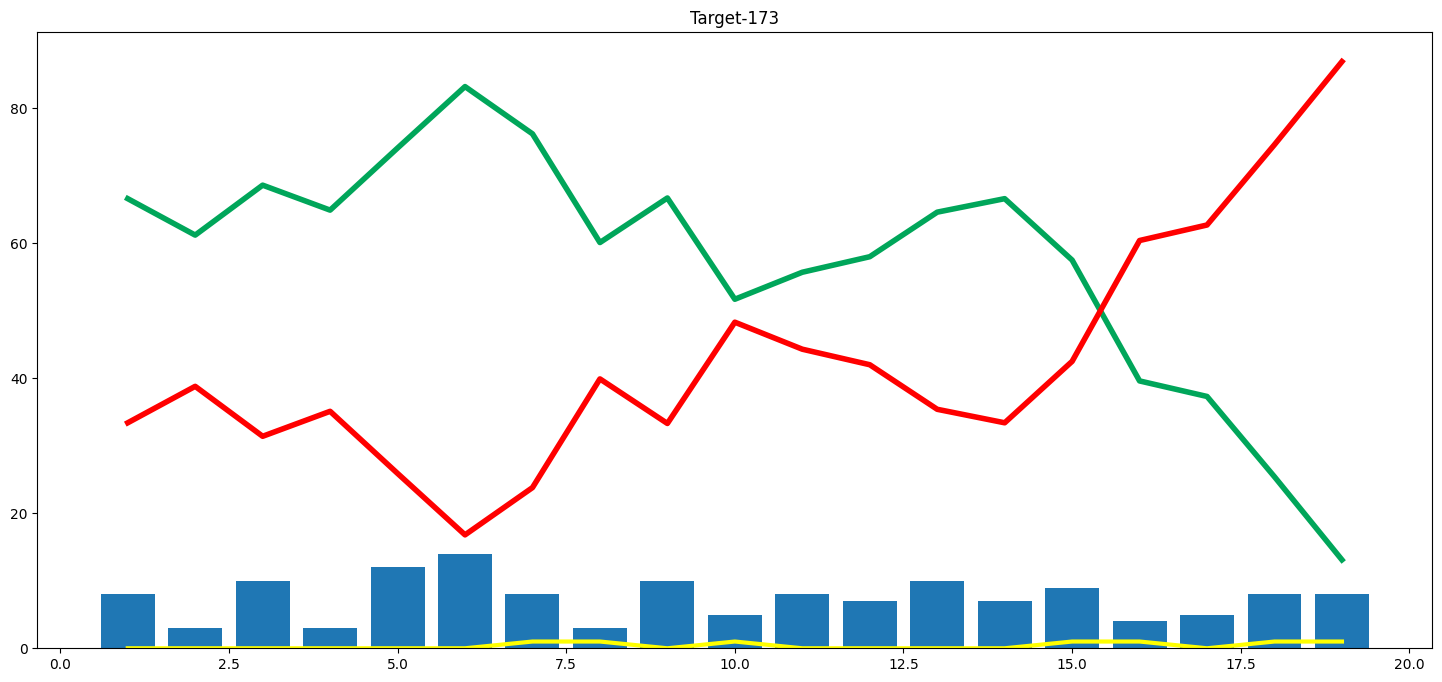

In [63]:
plt.figure(figsize=(18,8))
plt.plot(temp_df_lr['end_of_over'],temp_df_lr['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df_lr['end_of_over'],temp_df_lr['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df_lr['end_of_over'],temp_df_lr['lose'],color='red',linewidth=4)
plt.bar(temp_df_lr['end_of_over'],temp_df_lr['runs_after_over'])
plt.title('Target-' + str(target))

In [64]:
import pickle
pickle.dump(best_lr_model,open('pipe_lr.pkl','wb'))
# pickle.dump(pipe_rf,open('pipe_rf.pkl','wb'))
# pickle.dump(pipe_nb,open('pipe_dt.pkl','wb'))